In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
def get_numeric_data(df):
  df1 = pd.DataFrame()
  for col in df.columns:
    if df[col].dtype != "object":
      df1[col] = df[col]
  return df1

df1 = get_numeric_data(df)
df1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [12]:
X = df1.drop("HeartDisease",axis=1)
y = df1["HeartDisease"]

In [13]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [14]:
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X , columns=df1.drop("HeartDisease",axis=1).columns)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455


In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [21]:
X_train.shape , X_test.shape

((734, 6), (184, 6))

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [24]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [25]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [26]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [30]:
lg_pred = lg.predict(X_test)
nb_pred = nb.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
svc_pred = svc.predict(X_test)

In [50]:
from sklearn.metrics import roc_auc_score , roc_curve , auc

lg_fpr , lg_tpr , lg_threshold = roc_curve(y_test,lg_pred)
lg_auc = round(auc(lg_fpr , lg_tpr),3)
nb_fpr , nb_tpr , nb_threshold = roc_curve(y_test,nb_pred)
nb_auc = round(auc(nb_fpr , nb_tpr),3)
knn_fpr , knn_tpr , knn_threshold = roc_curve(y_test,knn_pred)
knn_auc = round(auc(knn_fpr , knn_tpr),3)
dt_fpr , dt_tpr , dt_threshold = roc_curve(y_test,dt_pred)
dt_auc = round(auc(dt_fpr , dt_tpr),3)
rf_fpr , rf_tpr , rf_threshold = roc_curve(y_test,rf_pred)
rf_auc = round(auc(rf_fpr , rf_tpr),3)
svc_fpr , svc_tpr , svc_threshold = roc_curve(y_test,svc_pred)
svc_auc = round(auc(svc_fpr , svc_tpr),3)

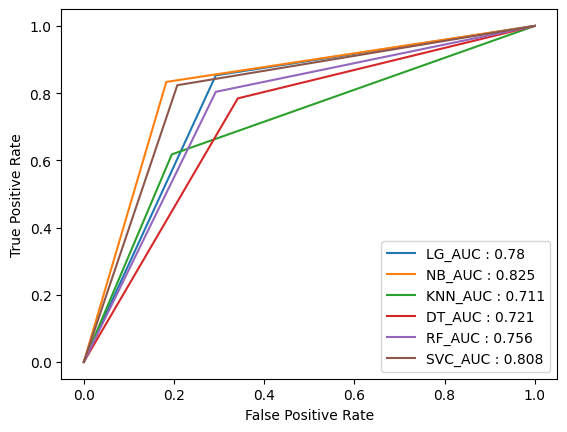

In [51]:
import matplotlib.pyplot as plt
plt.plot(lg_fpr , lg_tpr , label=f"LG_AUC : {lg_auc}")
plt.plot(nb_fpr , nb_tpr , label=f"NB_AUC : {nb_auc}")
plt.plot(knn_fpr , knn_tpr , label=f"KNN_AUC : {knn_auc}")
plt.plot(dt_fpr , dt_tpr , label=f"DT_AUC : {dt_auc}")
plt.plot(rf_fpr , rf_tpr , label=f"RF_AUC : {rf_auc}")
plt.plot(svc_fpr , svc_tpr , label=f"SVC_AUC : {svc_auc}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [44]:
pred = {
    "lg" : lg_pred,
    "nb" : nb_pred,
    "knn" : knn_pred,
    "dt" : dt_pred,
    "rf" : rf_pred,
    "svc" : svc_pred
}
scores = {}
for key in pred:
  scores[key] = roc_auc_score(y_test , pred[key])
scores

{'lg': 0.7801291248206599,
 'nb': 0.8252032520325204,
 'knn': 0.7112625538020086,
 'dt': 0.7214251554280248,
 'rf': 0.7556193208990913,
 'svc': 0.8081061692969871}